In [22]:
import pandas as pd 
import seaborn as sns

In [23]:
df = pd.read_csv('raw_data.csv')
df.shape


(50418, 14)

In [24]:
df.replace('#NUM!',pd.NA,inplace=True)

In [25]:
col = ['col_1','col_2','col_3','col_4','col_5']

In [26]:
df = df.drop(columns=col)

In [27]:
num_col = df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['total_cases', 'total_deaths', 'stringency_index', 'population',
       'gdp_per_capita', 'human_development_index'],
      dtype='object')

In [28]:
q1 = df[num_col].quantile(0.25)
q3 = df[num_col].quantile(0.75)
iqr = q3-q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)


outliers_col = [x for x in num_col if ((df[x]<lower_limit[x])|(df[x]>upper_limit[x])).any()]
print(outliers_col)

['total_cases', 'total_deaths', 'population', 'gdp_per_capita', 'human_development_index']


In [29]:
for x in outliers_col:
   df[x] = df[x].where((df[x] >= lower_limit[x]) & (df[x] <= upper_limit[x]), df[x].median())

In [30]:
df.isnull().sum()

iso_code                      0
location                      0
date                          0
total_cases                   0
total_deaths                  0
stringency_index           7126
population                    0
gdp_per_capita                0
human_development_index       0
dtype: int64

In [31]:
null_var = df.isnull().sum()/df.shape[0]*100
null_var

iso_code                    0.000000
location                    0.000000
date                        0.000000
total_cases                 0.000000
total_deaths                0.000000
stringency_index           14.133841
population                  0.000000
gdp_per_capita              0.000000
human_development_index     0.000000
dtype: float64

In [32]:
null_col = null_var[null_var>0].keys()
null_col

Index(['stringency_index'], dtype='object')

In [33]:
df[null_col]=df[null_col].fillna(df[null_col].median())
df[null_col].median()

stringency_index    61.11
dtype: float64

In [34]:
df.isnull().sum()

iso_code                   0
location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
dtype: int64

<Axes: >

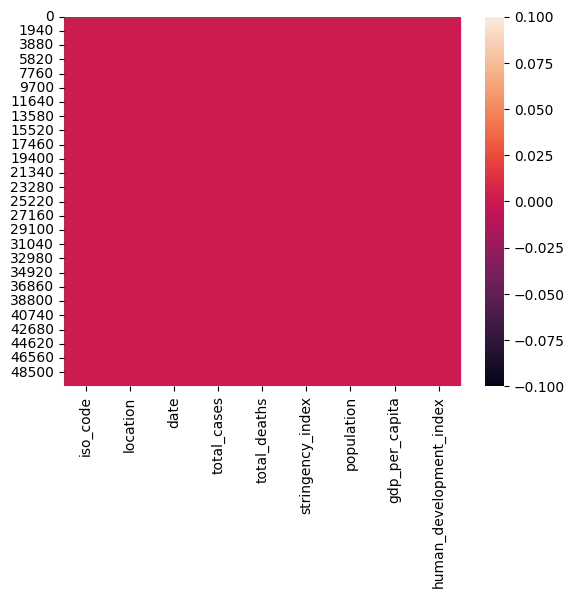

In [35]:
sns.heatmap(df.isnull())

In [36]:
df.to_csv('Clean_Data.csv',index=True)